In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [3]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
df[['DateofTermination','DOB','DateofHire']].dtypes
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [ ]:
# Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

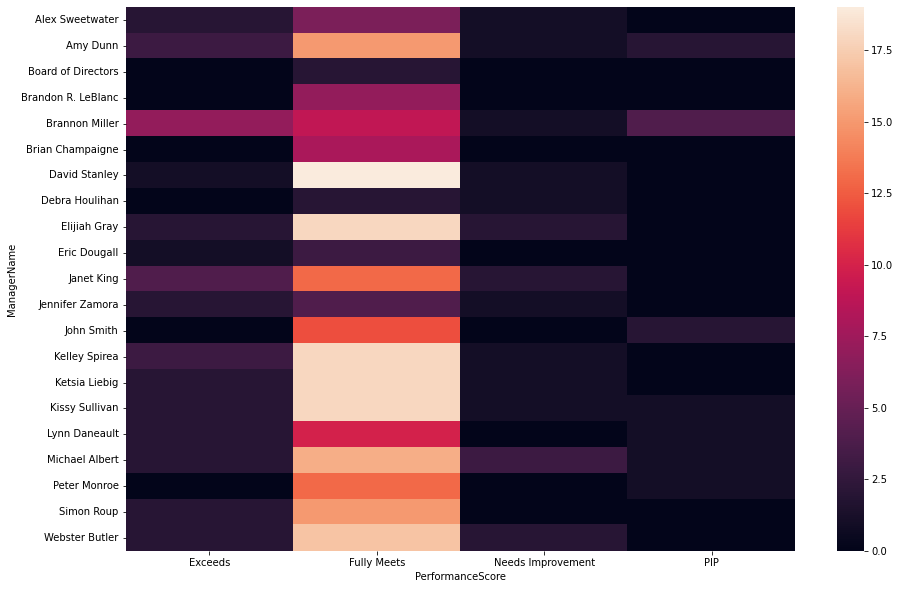

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(df.pivot_table(index=df['ManagerName'],columns=df['PerformanceScore'],values='PerformanceScore',aggfunc='count').fillna(0))

In [ ]:
# Można zauważyć pewną zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore). Np. David Stanley przyznał najwięcej ocen "Fully Meets", przy niewielu pozostałych ocenach. Z kolei, Brannon Miller często oceniał pracowników jako "Fully Meets", jak również "Exceeds".

In [ ]:
# Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [5]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')


df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.916035
1,2014-01-06,NaT,5.722226
2,2014-09-29,NaT,4.993942
3,2015-02-16,2015-04-15,0.158799
4,2015-05-01,NaT,4.408030


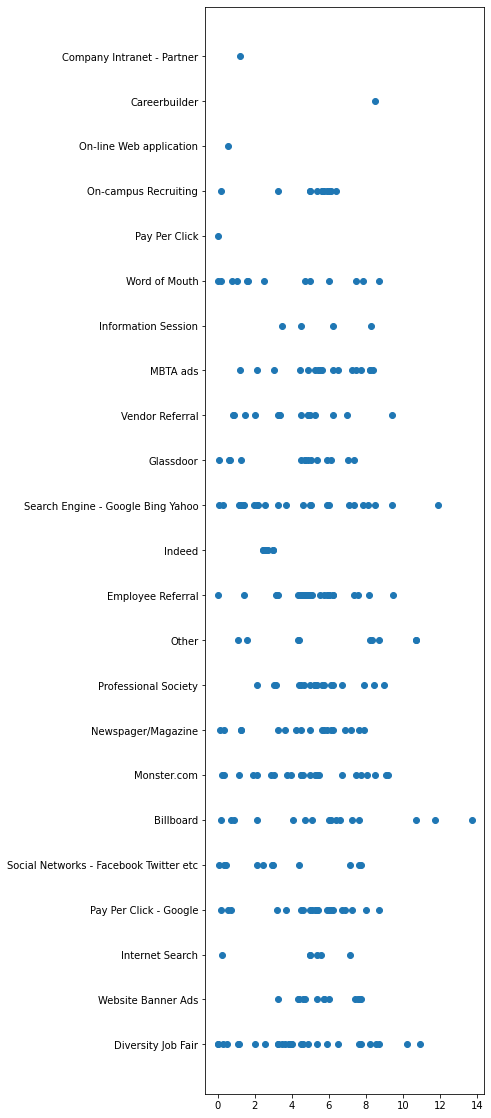

In [6]:
plt.figure(figsize=(5,20))
plt.scatter(df['Seniority'],df['RecruitmentSource'])

In [ ]:
# Pracownicy z najdłuższym stażem pracy zostali pozyskani przez Billboard.

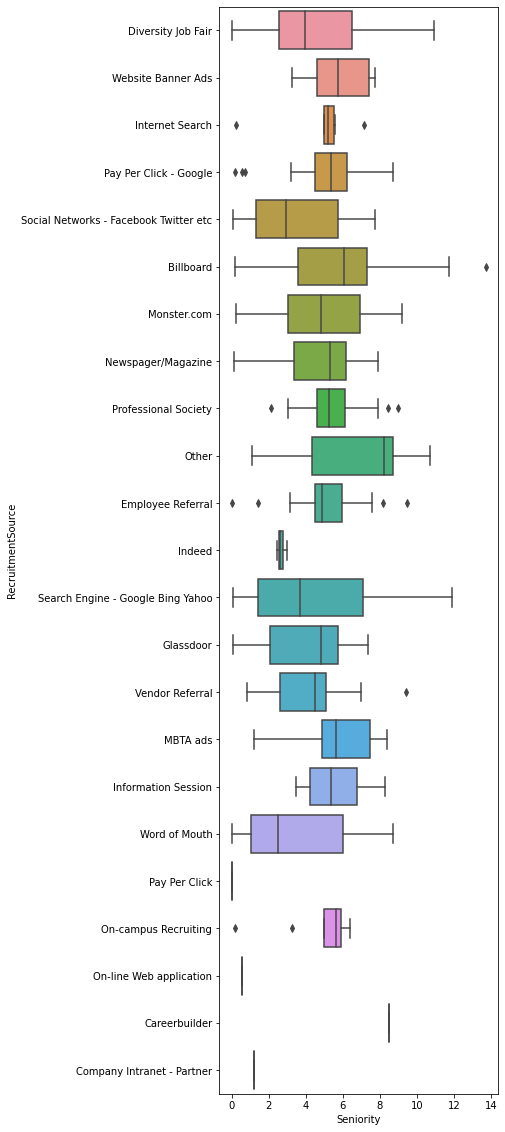

In [7]:
plt.figure(figsize=(5,20))
sns.boxplot(x='Seniority',y='RecruitmentSource',data=df)

In [ ]:
# Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

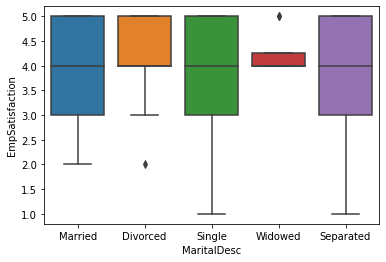

In [8]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

In [ ]:
# Nie wydaje się, aby stan cywilny pracownika miał większy wpływ na jego zadowolenie z pracy.

In [ ]:
# Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [9]:
df['Age']=df.apply(lambda row: dt.datetime(2019,9,27)-row['DOB'],axis=1)/np.timedelta64(1,'Y')
df['Age']

0      31.841858
1      35.420303
2      33.071179
3      34.029446
4      31.357249
         ...    
305   -32.310041
306    33.429845
307    36.630458
308   -45.953031
309    41.405368
Name: Age, Length: 310, dtype: float64

In [12]:
ques_4=df[df['Age']>0]
ques_4

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,31.841858
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,35.420303
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,33.071179
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158799,34.029446
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,31.357249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,"Carr, Claudia N",1.010022e+09,0.0,0.0,0.0,2.0,3.0,3.0,0.0,61.30,...,IT/IS,Simon Roup,4.0,Vendor Referral,Fully Meets,5.00,5.0,6.0,3.241682,33.309377
304,"Roehrich, Bianca",1.111030e+09,0.0,0.0,0.0,5.0,3.0,3.0,0.0,58.50,...,IT/IS,Simon Roup,4.0,Vendor Referral,Fully Meets,3.88,3.0,7.0,0.846013,46.336338
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,4.878950,33.429845
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3.241682,36.630458


In [13]:
que_4=ques_4[ques_4['DateofTermination'].isnull()]
que_4

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.916035,31.841858
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.722226,35.420303
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.993942,33.071179
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.408030,31.357249
8,"Dietrich, Jenna",1.408069e+09,0.0,0.0,0.0,1.0,6.0,1.0,0.0,55.00,...,Sales,John Smith,17.0,Website Banner Ads,PIP,2.30,1.0,0.0,7.600430,32.373012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,"Boutwell, Bonalyn",1.307060e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,34.95,...,Admin Offices,Brandon R. LeBlanc,3.0,Diversity Job Fair,Fully Meets,5.00,4.0,3.0,4.610635,32.482529
302,"Carr, Claudia N",1.010022e+09,0.0,0.0,0.0,2.0,3.0,3.0,0.0,61.30,...,IT/IS,Simon Roup,4.0,Vendor Referral,Fully Meets,5.00,5.0,6.0,3.241682,33.309377
306,"Lajiri, Jyoti",1.108028e+09,1.0,1.0,1.0,3.0,3.0,3.0,0.0,56.20,...,IT/IS,Peter Monroe,7.0,Employee Referral,Fully Meets,4.46,5.0,6.0,4.878950,33.429845
307,"Semizoglou, Jeremiah",9.040136e+08,1.0,1.0,1.0,2.0,3.0,3.0,0.0,53.80,...,IT/IS,Peter Monroe,7.0,On-campus Recruiting,Fully Meets,3.27,4.0,5.0,3.241682,36.630458


In [14]:
def is_active(row):
  if pd.isnull(row['DateofTermination']):
    return 'Yes'
  else:
    return 'No'

In [15]:
ques_4['Active']=ques_4.apply(lambda row: is_active(row),axis=1)
ques_4.head

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<bound method NDFrame.head of               Employee_Name         EmpID  MarriedID  MaritalStatusID  \
0                Brown, Mia  1.103024e+09        1.0              1.0   
1      LaRotonda, William    1.106027e+09        0.0              2.0   
2          Steans, Tyrone    1.302053e+09        0.0              0.0   
3           Howard, Estelle  1.211051e+09        1.0              1.0   
4               Singh, Nan   1.307060e+09        0.0              0.0   
..                      ...           ...        ...              ...   
302        Carr, Claudia  N  1.010022e+09        0.0              0.0   
304        Roehrich, Bianca  1.111030e+09        0.0              0.0   
306          Lajiri,  Jyoti  1.108028e+09        1.0              1.0   
307  Semizoglou, Jeremiah    9.040136e+08        1.0              1.0   
309         Warfield, Sarah  1.301052e+09        0.0              4.0   

     GenderID  EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  \
0         0.0     

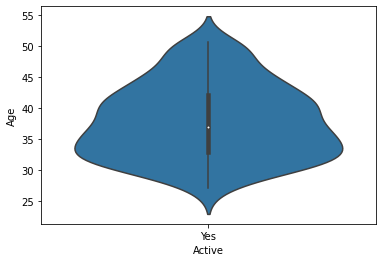

In [ ]:
sns.violinplot(x='Active',y='Age',data=ques_4[ques_4['Active']=='Yes'])

In [ ]:
# Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

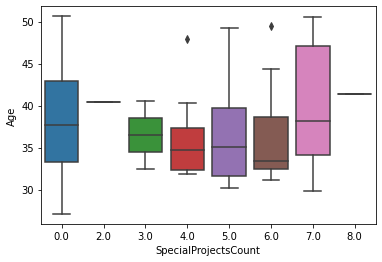

In [ ]:
sns.boxplot(x='SpecialProjectsCount',y='Age',data=ques_4)

In [ ]:
# Istnieje niewielka zależność między wiekiem a liczbą specjalnych projektów. Średnia wieku osób o największej ilości (7-8) specjalnych projektów jest wyższa niż średnia wieku aktualnie zatrudnionych pracowników.